In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import datetime

In [ ]:
anz_data = pd.read_excel (r'https://insidesherpa.s3.amazonaws.com/vinternships/companyassets/AKkAyEwWc8wjPxx9n/Gz8nAM5drF9tcbBa4/ANZ%20synthesised%20transaction%20dataset.xlsx')

In [ ]:
anz_data.head(100)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,authorized,0.0,NaN,ACC-1799207998,AUD,150.68 -33.79,POS,eb3f245f-1016-416a-bab1-6743f6450d34,NaN,Susan,43.06,2018-08-01,F,20,Brookvale,NSW,2018-08-01T16:28:40.000+0000,76.82,954d5cc3ef1c4dbe96219af4ae7d7b5a,Australia,CUS-164374203,151.27 -33.77,debit
96,authorized,0.0,NaN,ACC-3879258709,AUD,143.83 -37.66,POS,d8baa380-1cf2-485e-8b61-e6b73aab3400,NaN,Natasha,186344.95,2018-08-01,F,40,Ballarat,VIC,2018-08-01T16:45:20.000+0000,26.91,1eb22646ff724bfb9d3f3b8108abf785,Australia,CUS-527400765,143.81 -37.55,debit
97,posted,NaN,0,ACC-819621312,AUD,145.04 -37.85,PAY/SALARY,NaN,0.0,Michele,1244.45,2018-08-01,F,30,NaN,NaN,2018-08-01T17:00:00.000+0000,1158.15,148a346f380948cfa1ee8e5166b56a6e,Australia,CUS-1271030853,NaN,credit
98,posted,NaN,0,ACC-2920611728,AUD,144.96 -37.76,PAY/SALARY,NaN,0.0,Tyler,1969.05,2018-08-01,M,69,NaN,NaN,2018-08-01T17:00:00.000+0000,1043.12,360a8968ef944c9e91ee1f72a9759aec,Australia,CUS-1388323263,NaN,credit


In [ ]:
anz_data.notnull().sum()

status               12043
card_present_flag     7717
bpay_biller_code       885
account              12043
currency             12043
long_lat             12043
txn_description      12043
merchant_id           7717
merchant_code          883
first_name           12043
balance              12043
date                 12043
gender               12043
age                  12043
merchant_suburb       7717
merchant_state        7717
extraction           12043
amount               12043
transaction_id       12043
country              12043
customer_id          12043
merchant_long_lat     7717
movement             12043
dtype: int64

In [ ]:
anz_data['month'] = 0
anz_data['month'] = anz_data['date'].astype(str)
anz_data['month'] = anz_data['month'].str.slice(start = 0, stop = 7)

anz_salary = anz_data[['account','txn_description','customer_id','movement','amount','month']]
anz_salary = anz_salary.loc[anz_salary['txn_description'] == 'PAY/SALARY']

anz_salary = anz_salary.pivot_table(index='customer_id',columns='month',values='amount',aggfunc = 'mean')
anz_salary = pd.DataFrame(anz_salary.to_records())
anz_salary = anz_salary.drop([0])

anz_salary['monthly_salary'] = 0
anz_salary['monthly_salary'] = anz_salary[['2018-08', '2018-09','2018-10']].max(axis=1)
anz_salary['yearly_salary'] = 0
anz_salary['yearly_salary'] = 12*anz_salary['monthly_salary']
anz_salary = anz_salary[['customer_id','yearly_salary']]

anz_salary['customer_id'] = anz_salary['customer_id'].str.slice(start = 4, stop = 14)
anz_salary['customer_id'] = anz_salary['customer_id'].astype(int)
anz_salary['yearly_salary'] = round(anz_salary['yearly_salary'],0)
anz_salary['yearly_salary'] = anz_salary['yearly_salary'].astype(int)

anz_salary.head()

,customer_id,yearly_salary
1,1117979751,42944
2,1140341822,22998
3,1147642491,20537
4,1196156254,46845
5,1220154422,27388


**Features: Age, Gender, Long_lat**

In [ ]:
cust_demographics = anz_data.copy()
cust_demographics = cust_demographics.drop(['merchant_code','merchant_long_lat','merchant_state','merchant_suburb','merchant_id','merchant_code','bpay_biller_code','card_present_flag'],axis=1)
cust_demographics = cust_demographics[['customer_id','age','gender','long_lat']]
cust_demographics = cust_demographics.pivot_table(index='customer_id',aggfunc = 'max')
cust_demographics = pd.DataFrame(cust_demographics.to_records())
cust_demographics = cust_demographics.drop([0])
cust_demographics[['cust_longitude','cust_latitude']] = cust_demographics.long_lat.str.split(expand=True) 
cust_demographics['cust_latitude'] = pd.to_numeric(cust_demographics['cust_latitude'])
cust_demographics['cust_latitude'] = cust_demographics['cust_latitude'] * (-1)
cust_demographics = cust_demographics.drop(['long_lat'], axis=1)

cust_demographics['customer_id'] = cust_demographics['customer_id'].str.slice(start = 4, stop = 14)
cust_demographics['customer_id'] = cust_demographics['customer_id'].astype(int)

cust_demographics['cust_latitude'] = round((cust_demographics['cust_latitude'].astype(float)),0)
cust_demographics['cust_longitude'] = round((cust_demographics['cust_longitude'].astype(float)),0)

cust_demographics['cust_latitude'] = cust_demographics['cust_latitude'].astype(int)
cust_demographics['cust_longitude'] = cust_demographics['cust_longitude'].astype(int)

cust_demographics['cust_longitude_10s'] = 0
cust_demographics['cust_longitude_10s'] = round((cust_demographics['cust_longitude'] / 10),0)*10

cust_demographics['cust_latitude_10s'] = 0
cust_demographics['cust_latitude_10s'] = round((cust_demographics['cust_latitude'] / 10),0)*10

cust_demographics['age_10s'] = 0
cust_demographics['age_10s'] = round((cust_demographics['age'] / 10),0)*10


cust_demographics['gender'] = cust_demographics['gender'].astype(str)
cust_demographics['male'] = 0
cust_demographics['female'] = 0

cust_demographics['male'].loc[cust_demographics['gender'] == 'M'] = 1
cust_demographics['female'].loc[cust_demographics['gender'] == 'F'] = 1
cust_demographics = cust_demographics.drop(['gender'], axis=1)

cust_demographics.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,customer_id,age,cust_longitude,cust_latitude,cust_longitude_10s,cust_latitude_10s,age_10s,male,female
1,1117979751,21,116,32,120.0,30.0,20.0,1,0
2,1140341822,28,145,37,140.0,40.0,30.0,1,0
3,1147642491,34,151,34,150.0,30.0,30.0,0,1
4,1196156254,34,139,35,140.0,40.0,30.0,0,1
5,1220154422,25,150,23,150.0,20.0,20.0,0,1


In [ ]:
print(cust_demographics.dtypes)
print(anz_salary.dtypes)

customer_id             int64
age                     int64
cust_longitude          int64
cust_latitude           int64
cust_longitude_10s    float64
cust_latitude_10s     float64
age_10s               float64
male                    int64
female                  int64
dtype: object
customer_id      int64
yearly_salary    int64
dtype: object


In [ ]:
cust_demo = cust_demographics.merge(anz_salary, on='customer_id')
cust_demo.head()

,customer_id,age,cust_longitude,cust_latitude,cust_longitude_10s,cust_latitude_10s,age_10s,male,female,yearly_salary
0,1117979751,21,116,32,120.0,30.0,20.0,1,0,42944
1,1140341822,28,145,37,140.0,40.0,30.0,1,0,22998
2,1147642491,34,151,34,150.0,30.0,30.0,0,1,20537
3,1196156254,34,139,35,140.0,40.0,30.0,0,1,46845
4,1220154422,25,150,23,150.0,20.0,20.0,0,1,27388


   cust_latitude  yearly_salary
1             17        73287.0
2             21        11001.0
3             23        28926.0
4             24        38775.0
5             27        45373.0


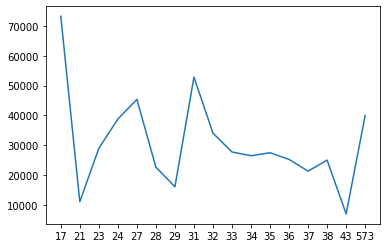

   cust_latitude  yearly_salary  median_salary  salary_std_dev
1             17        73287.0        27455.0         16024.0
2             21        11001.0        27455.0         16024.0
3             23        28926.0        27455.0         16024.0
4             24        38775.0        27455.0         16024.0
5             27        45373.0        27455.0         16024.0
   cust_latitude  lat_wealthy  lat_average  lat_poor
1             17            1            0         0
2             21            0            0         1
3             23            0            1         0
4             24            0            1         0
5             27            1            0         0


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [ ]:
lat_info = cust_demo.pivot_table(index='cust_latitude',values='yearly_salary',aggfunc = 'mean')
lat_info = pd.DataFrame(lat_info.to_records())
lat_info = lat_info.drop([0])
print(lat_info.head())
plt.xticks(lat_info.index,lat_info["cust_latitude"].values)
plt.plot(lat_info['yearly_salary'])
plt.show()
lat_info['median_salary'] = round(lat_info['yearly_salary'].median(),0)
lat_info['salary_std_dev'] = round(lat_info['yearly_salary'].std(),0)
print(lat_info.head())
lat_info['lat_wealthy'] = 0
lat_info['lat_average'] = 0
lat_info['lat_poor'] = 0

lat_info['lat_wealthy'].loc[lat_info['yearly_salary'] > (lat_info['median_salary'] +lat_info['salary_std_dev'])  ] = 1
lat_info['lat_poor'].loc[lat_info['yearly_salary'] < (lat_info['median_salary'] - lat_info['salary_std_dev'])  ] = 1
lat_info['lat_average'].loc[(lat_info['lat_wealthy']+lat_info['lat_poor']) == 0] = 1
lat_info = lat_info.drop(['yearly_salary','median_salary','salary_std_dev'],axis=1)
print(lat_info.head())
#cust_demographics['male'].loc[cust_demographics['gender'] == 'M'] = 1

   cust_longitude  long_wealthy  long_average  long_poor
1             116             0             1          0
2             121             1             0          0
3             131             0             1          0
4             139             0             1          0
5             143             0             1          0


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


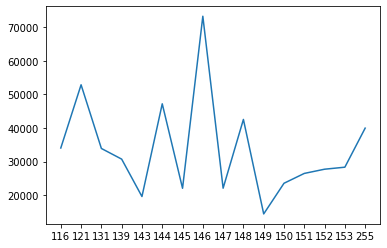

In [ ]:
long_info = cust_demo.pivot_table(index='cust_longitude',values='yearly_salary',aggfunc = 'mean')
long_info = pd.DataFrame(long_info.to_records())
long_info = long_info.drop([0])

plt.xticks(long_info.index,long_info["cust_longitude"].values)
plt.plot(long_info['yearly_salary'])

long_info['median_salary'] = round(long_info['yearly_salary'].median(),0)
long_info['salary_std_dev'] = round(long_info['yearly_salary'].std(),0)

long_info['long_wealthy'] = 0
long_info['long_average'] = 0
long_info['long_poor'] = 0

long_info['long_wealthy'].loc[long_info['yearly_salary'] > (long_info['median_salary'] +long_info['salary_std_dev'])  ] = 1
long_info['long_poor'].loc[long_info['yearly_salary'] < (long_info['median_salary'] - long_info['salary_std_dev'])  ] = 1
long_info['long_average'].loc[(long_info['long_wealthy']+long_info['long_poor']) == 0] = 1
long_info = long_info.drop(['yearly_salary','median_salary','salary_std_dev'],axis=1)
print(long_info.head())

In [ ]:
cust_geo_lat = cust_demo.merge(lat_info, on='cust_latitude')
cust_geo_lat.head()

,customer_id,age,cust_longitude,cust_latitude,cust_longitude_10s,cust_latitude_10s,age_10s,male,female,yearly_salary,lat_wealthy,lat_average,lat_poor
0,1117979751,21,116,32,120.0,30.0,20.0,1,0,42944,0,1,0
1,127297539,20,116,32,120.0,30.0,20.0,0,1,13665,0,1,0
2,134833760,52,116,32,120.0,30.0,50.0,1,0,45429,0,1,0
3,1609060617,19,116,32,120.0,30.0,20.0,1,0,34257,0,1,0
4,1646621553,26,116,32,120.0,30.0,30.0,1,0,13187,0,1,0


In [ ]:
cust_geo_long = cust_geo_lat.merge(long_info,on='cust_longitude')
cust_geo_long.head()

,customer_id,age,cust_longitude,cust_latitude,cust_longitude_10s,cust_latitude_10s,age_10s,male,female,yearly_salary,lat_wealthy,lat_average,lat_poor,long_wealthy,long_average,long_poor
0,1117979751,21,116,32,120.0,30.0,20.0,1,0,42944,0,1,0,0,1,0
1,127297539,20,116,32,120.0,30.0,20.0,0,1,13665,0,1,0,0,1,0
2,134833760,52,116,32,120.0,30.0,50.0,1,0,45429,0,1,0,0,1,0
3,1609060617,19,116,32,120.0,30.0,20.0,1,0,34257,0,1,0,0,1,0
4,1646621553,26,116,32,120.0,30.0,30.0,1,0,13187,0,1,0,0,1,0


In [ ]:
cust_txn = anz_data.copy()
cust_txn = cust_txn.drop(['status','card_present_flag','bpay_biller_code','account','currency','long_lat','merchant_id','merchant_code'
,'first_name','date','gender','age','merchant_suburb','merchant_state','extraction','country','merchant_long_lat','movement'], axis=1)

cust_txn = cust_txn.loc[(cust_txn['txn_description']=='SALES-POS') | (cust_txn['txn_description']=='POS')]
cust_txn['customer_id'] = cust_txn['customer_id'].str.slice(start = 4, stop = 14)
cust_txn['customer_id'] = cust_txn['customer_id'].astype(int)
print(cust_txn.head())


cust_txn_amt = cust_txn.pivot_table(index='customer_id',values='amount',aggfunc = 'median')
cust_txn_amt = pd.DataFrame(cust_txn_amt.to_records())
cust_txn_amt = cust_txn_amt.drop([0])
cust_txn_amt['amount'] = round(cust_txn_amt['amount'],0)

cust_avg_bal = cust_txn.pivot_table(index='customer_id',values='balance',aggfunc = 'mean')
cust_avg_bal = pd.DataFrame(cust_avg_bal.to_records())
cust_avg_bal = cust_avg_bal.drop([0])
cust_avg_bal['balance'] = round((cust_avg_bal['balance']/10000),0)*10000

cust_txn_freq = cust_txn.pivot_table(index='customer_id',values='transaction_id',aggfunc = 'count')
cust_txn_freq = pd.DataFrame(cust_txn_freq.to_records())
cust_txn_freq = cust_txn_freq.drop([0])
cust_txn_freq['avg_txn_num_mnth'] = round(cust_txn_freq['transaction_id']/3,0)
cust_txn_freq = cust_txn_freq.drop(['transaction_id'], axis=1)
cust_txn_freq['avg_txn_num_mnth'] = round((cust_txn_freq['avg_txn_num_mnth'] / 50),0)*50

cust_txn1 = cust_geo_long.merge(cust_txn_amt,on='customer_id')

cust_txn2 = cust_txn1.merge(cust_avg_bal,on='customer_id')

cust_txn3 = cust_txn2.merge(cust_txn_freq,on='customer_id')

cust_txn3 = cust_txn3.loc[(cust_txn3['cust_longitude'] > 110) & (cust_txn3['cust_longitude'] < 160)]
cust_txn3 = cust_txn3.loc[(cust_txn3['cust_latitude'] > 8) & (cust_txn3['cust_latitude'] < 50)]

#rounding median txn amount
cust_txn3['amount'] = round((cust_txn3['amount'] / 100),0)*100

cust_txn3.head(20)

  txn_description  balance  ...  customer_id    month
0             POS    35.39  ...   2487424745  2018-08
1       SALES-POS    21.20  ...   2487424745  2018-08
2             POS     5.71  ...   2142601169  2018-08
3       SALES-POS  2117.22  ...   1614226872  2018-08
4       SALES-POS    17.95  ...   2487424745  2018-08

[5 rows x 6 columns]


,customer_id,age,cust_longitude,cust_latitude,cust_longitude_10s,cust_latitude_10s,age_10s,male,female,yearly_salary,lat_wealthy,lat_average,lat_poor,long_wealthy,long_average,long_poor,amount,balance,avg_txn_num_mnth
0,1117979751,21,116,32,120.0,30.0,20.0,1,0,42944,0,1,0,0,1,0,0.0,10000.0,0.0
1,127297539,20,116,32,120.0,30.0,20.0,0,1,13665,0,1,0,0,1,0,0.0,10000.0,50.0
2,134833760,52,116,32,120.0,30.0,50.0,1,0,45429,0,1,0,0,1,0,0.0,10000.0,0.0
3,1609060617,19,116,32,120.0,30.0,20.0,1,0,34257,0,1,0,0,1,0,0.0,60000.0,0.0
4,1646621553,26,116,32,120.0,30.0,30.0,1,0,13187,0,1,0,0,1,0,0.0,10000.0,50.0
5,1669695324,25,116,32,120.0,30.0,20.0,0,1,14704,0,1,0,0,1,0,0.0,0.0,50.0
6,1816693151,40,116,32,120.0,30.0,40.0,1,0,106032,0,1,0,0,1,0,0.0,60000.0,0.0
7,3026014945,27,116,32,120.0,30.0,30.0,0,1,34082,0,1,0,0,1,0,0.0,10000.0,100.0
8,3716701010,47,116,32,120.0,30.0,50.0,0,1,15270,0,1,0,0,1,0,0.0,10000.0,0.0
9,3989008654,25,116,32,120.0,30.0,20.0,1,0,32254,0,1,0,0,1,0,0.0,10000.0,0.0


In [ ]:
cust_uniq_merch = cust_txn[['customer_id','amount']].copy()

#cust_uniq_merch['customer_id'] = cust_uniq_merch['customer_id'].str.slice(start = 4, stop = 14)
#cust_uniq_merch['customer_id'] = cust_uniq_merch['customer_id'].astype(int)
cust_uniq_merch = cust_uniq_merch.pivot_table(index='customer_id',values='amount',aggfunc = 'max')
cust_uniq_merch = pd.DataFrame(cust_uniq_merch.to_records())
cust_uniq_merch = cust_uniq_merch.drop([0])

cust_uniq_merch['highest_txn_amt_range'] = round(cust_uniq_merch['amount'],0)
cust_uniq_merch['highest_txn_amt_range'] = round((cust_uniq_merch['highest_txn_amt_range']/1000),0)*1000
cust_uniq_merch = cust_uniq_merch.drop(['amount'], axis=1)
cust_uniq_merch.head(20)

,customer_id,highest_txn_amt_range
1,55310383,1000.0
2,72755508,0.0
3,127297539,1000.0
4,134193016,0.0
5,134833760,0.0
6,164374203,1000.0
7,261674136,1000.0
8,325142416,4000.0
9,326006476,0.0
10,331942311,1000.0


In [ ]:
cust_txn4 = cust_txn3.merge(cust_uniq_merch,on='customer_id')
cust_txn4.head()

,customer_id,age,cust_longitude,cust_latitude,cust_longitude_10s,cust_latitude_10s,age_10s,male,female,yearly_salary,lat_wealthy,lat_average,lat_poor,long_wealthy,long_average,long_poor,amount,balance,avg_txn_num_mnth,highest_txn_amt_range
0,1117979751,21,116,32,120.0,30.0,20.0,1,0,42944,0,1,0,0,1,0,0.0,10000.0,0.0,3000.0
1,127297539,20,116,32,120.0,30.0,20.0,0,1,13665,0,1,0,0,1,0,0.0,10000.0,50.0,1000.0
2,134833760,52,116,32,120.0,30.0,50.0,1,0,45429,0,1,0,0,1,0,0.0,10000.0,0.0,0.0
3,1609060617,19,116,32,120.0,30.0,20.0,1,0,34257,0,1,0,0,1,0,0.0,60000.0,0.0,2000.0
4,1646621553,26,116,32,120.0,30.0,30.0,1,0,13187,0,1,0,0,1,0,0.0,10000.0,50.0,1000.0


In [ ]:
cust_txn4.columns

Index(['customer_id', 'age', 'cust_longitude', 'cust_latitude',
       'cust_longitude_10s', 'cust_latitude_10s', 'age_10s', 'male', 'female',
       'yearly_salary', 'lat_wealthy', 'lat_average', 'lat_poor',
       'long_wealthy', 'long_average', 'long_poor', 'amount', 'balance',
       'avg_txn_num_mnth', 'highest_txn_amt_range'],
      dtype='object')

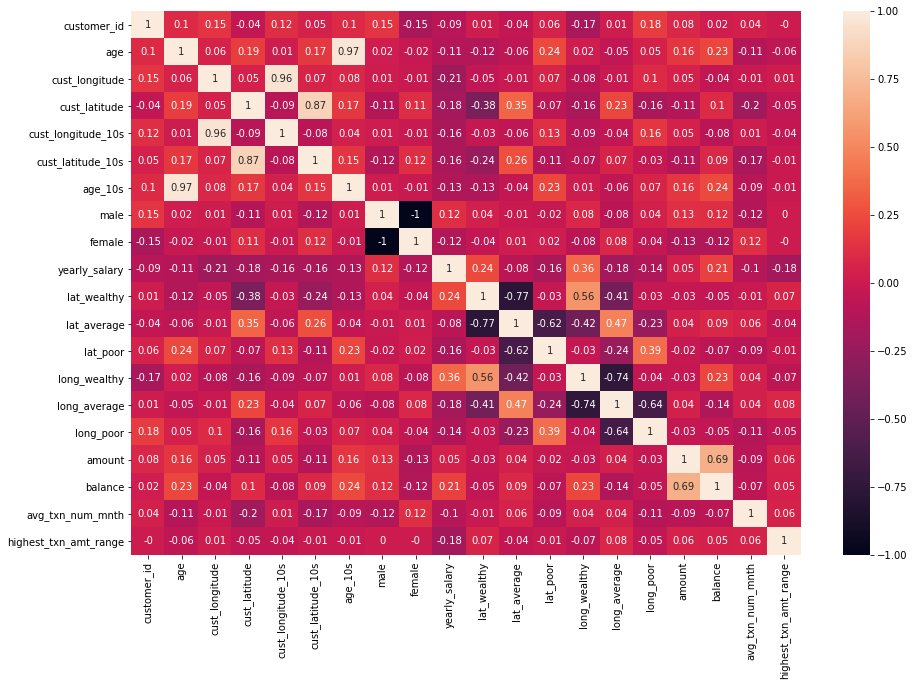

In [ ]:
import seaborn as sns

correlation_matrix = cust_txn4.corr().round(2)
fig, ax = plt.subplots(figsize=(15,10))
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, ax=ax)

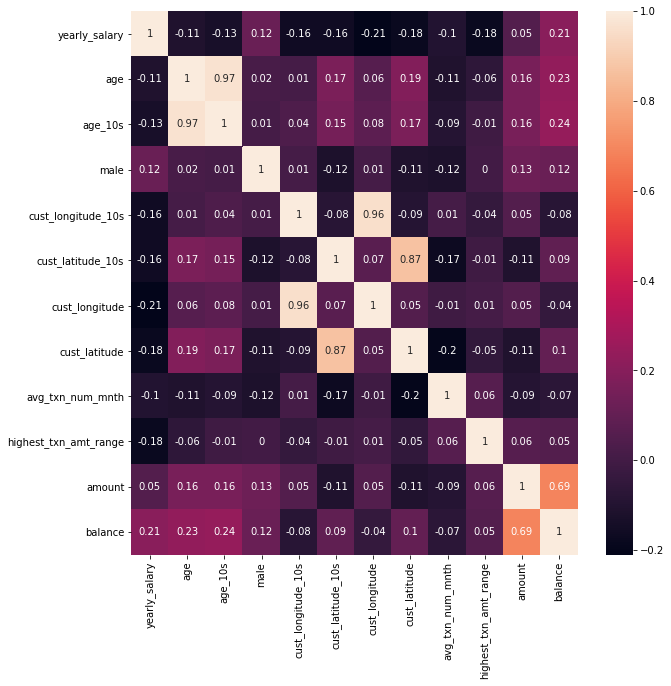

In [ ]:
import seaborn as sns

cust_txn4 =  cust_txn4[['yearly_salary','age','age_10s','male','cust_longitude_10s','cust_latitude_10s','cust_longitude','cust_latitude','avg_txn_num_mnth','highest_txn_amt_range','amount','balance']]

correlation_matrix = cust_txn4.corr().round(2)
fig, ax = plt.subplots(figsize=(10,10))
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, ax=ax)

In [ ]:
cust_txn3_X = cust_txn4[['age_10s','male','cust_longitude_10s','cust_latitude_10s','avg_txn_num_mnth','amount']]
cust_txn3_Y = cust_txn4['yearly_salary']
#,'lat_average','long_average'

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(cust_txn3_X, cust_txn3_Y, test_size=0.10, random_state=42)

In [ ]:

y_train = round((y_train/100),0)*100


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

regression_model = LinearRegression(copy_X=True)
# Fit the data(train the model)
regression_model.fit(X_train, y_train)

# Predict
y_predicted = regression_model.predict(X_test)

# model evaluation
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

# Evaluating model performance
print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)


Slope: [-160.24457663 2834.63642902 -252.10050813 -382.23663638  -63.43652288
   71.30120363]
Intercept: 80679.83521999928
Root mean squared error:  59945629.791751444
R2 score:  0.48668720559145506


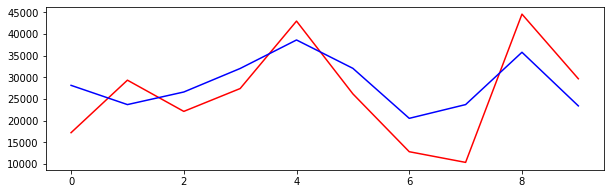

In [ ]:
#Plotting predicted vs. actual values.
plt.figure(figsize=(10,3))
plt.plot(y_test.to_numpy(), color='r')
plt.plot(y_predicted, color='b')

plt.show()

Feature: 0, Score: -160.24458
Feature: 1, Score: 2834.63643
Feature: 2, Score: -252.10051
Feature: 3, Score: -382.23664
Feature: 4, Score: -63.43652
Feature: 5, Score: 71.30120


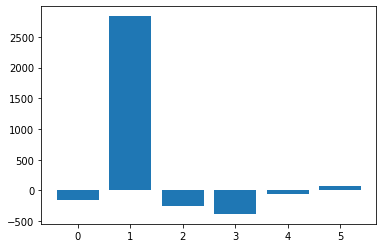

In [ ]:
importance = regression_model.coef_
features = cust_txn3_X.columns
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

#Feature 0: age_10s
#Feature 1: male
#Feature 2: cust_longitude_10s
#Feature 3: cust_latitude_10s
#Feature 4: avg_txn_num_mnth
#Feature 5: amount

In [ ]:
from sklearn.model_selection import train_test_split 
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(cust_txn3_X, cust_txn3_Y, test_size=0.10, random_state=42)

In [ ]:
from sklearn import tree

tree_regression_model = tree.DecisionTreeRegressor()
# Fit the data(train the model)
tree_regression_model.fit(X_train_tree, y_train_tree)
# Predict
y_predicted_tree = tree_regression_model.predict(X_test_tree)

# model evaluation
rmse = mean_squared_error(y_test_tree, y_predicted_tree)
r2 = r2_score(y_test_tree, y_predicted_tree)

# printing values
print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Root mean squared error:  376426037.0611111
R2 score:  -2.2233258978715615


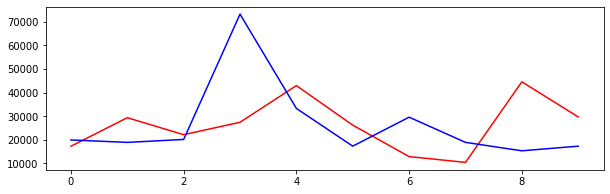

In [ ]:
plt.figure(figsize=(10,3))
plt.plot(y_test_tree.to_numpy(), color='r')
plt.plot(y_predicted_tree, color='b')

plt.show()

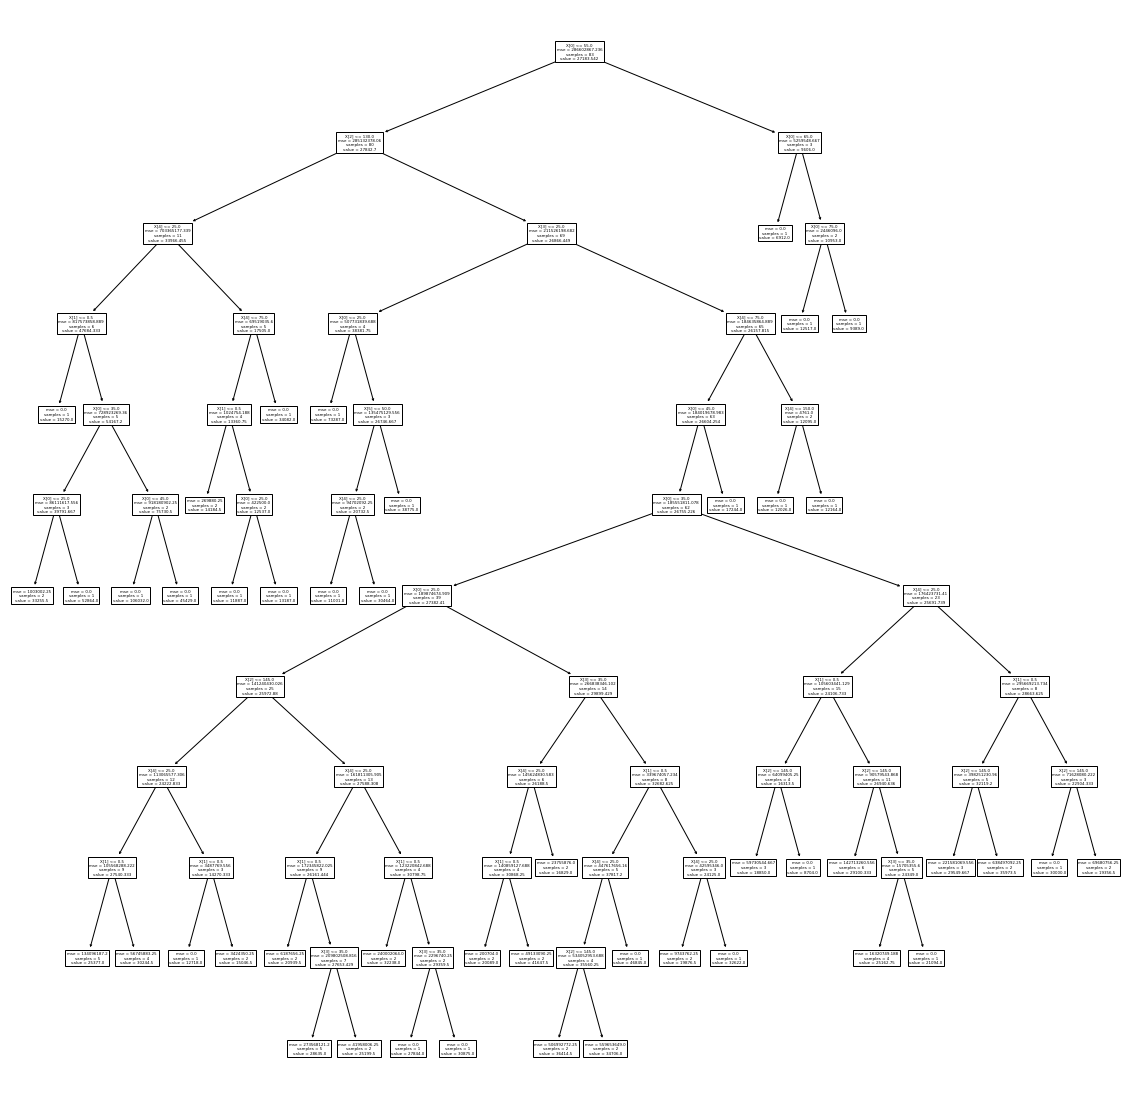

In [ ]:
plt.figure(figsize=(20,20))
tree.plot_tree(tree_regression_model);


#**Deprecated Zone**

In [ ]:
cust_merch = cust_geo_long.merge(merch_group,on='merchant_id')
cust_merch.head()

#merch_group['merchant_id'] = merch_group['merchant_id'].str.slice(start = 3, stop = 8)
#print(merch_group.head(20))

KeyError: ignored

In [ ]:
merch_info = anz_data.loc[(anz_data['txn_description'] == 'SALES-POS') | (anz_data['txn_description'] == 'POS')]

merch_info = merch_info[['merchant_id','merchant_long_lat','amount']]


merch_info[['merch_longitude','merch_latitude']] = merch_info.merchant_long_lat.str.split(expand=True) 
merch_info['merch_latitude'] = pd.to_numeric(merch_info['merch_latitude'])
merch_info['merch_latitude'] = merch_info['merch_latitude'] * (-1)
merch_info = merch_info.drop(['merchant_long_lat'], axis=1)
merch_info['merch_latitude'] = merch_info['merch_latitude'].astype(float)
merch_info['merch_longitude'] = merch_info['merch_longitude'].astype(float)

merch_info['merch_latitude'] = (round(merch_info['merch_latitude'],0)).astype(int)
merch_info['merch_longitude'] = (round(merch_info['merch_longitude'],0)).astype(int)
merch_info['amount'] = (round(merch_info['amount'],0)).astype(int)


merch_group = merch_info.pivot_table(index='merchant_id',values='amount',aggfunc = 'mean')
merch_group = pd.DataFrame(merch_group.to_records())
merch_group = merch_group.drop([0])
merch_group['amount'] = round(merch_group['amount'],0)

merch_group['median_spend'] = round(merch_group['amount'].median(),0)

merch_group['merch_premium'] = 0
merch_group['merch_costly'] = 0
merch_group['merch_average'] = 0
#print(merch_group.head())

merch_group['merch_premium'].loc[merch_group['amount'] > (5*merch_group['median_spend'])  ] = 1
merch_group['merch_average'].loc[(merch_group['amount'] < (2*merch_group['median_spend']))] = 1
merch_group['merch_costly'].loc[(merch_group['merch_premium']+ merch_group['merch_average'])== 0 ] = 1
merch_group = merch_group.drop(['amount','median_spend'],axis=1)
print(merch_group.head())
#merch_info = merch_info.drop(['amount'],axis=1)
#merch_info.notnull().sum()

#ust_demo.pivot_table(index='cust_longitude',values='yearly_salary',aggfunc = 'mean')

In [ ]:
s



cust_demo.pivot_table(index='cust_longitude',values='yearly_salary',aggfunc = 'mean')
long_info = pd.DataFrame(long_info.to_records())
long_info = long_info.drop([0])

plt.xticks(long_info.index,long_info["cust_longitude"].values)
plt.plot(long_info['yearly_salary'])

long_info['median_salary'] = round(long_info['yearly_salary'].median(),0)
long_info['salary_std_dev'] = round(long_info['yearly_salary'].std(),0)

long_info['long_wealthy'] = 0
long_info['long_average'] = 0
long_info['long_poor'] = 0

long_info['long_wealthy'].loc[long_info['yearly_salary'] > (long_info['median_salary'] +long_info['salary_std_dev'])  ] = 1
long_info['long_poor'].loc[long_info['yearly_salary'] < (long_info['median_salary'] - long_info['salary_std_dev'])  ] = 1
long_info['long_average'].loc[(long_info['long_wealthy']+long_info['long_poor']) == 0] = 1
long_info = long_info.drop(['yearly_salary','median_salary','salary_std_dev'],axis=1)
print(long_info.head())